** Git Hub Link: **
https://github.com/cbeavers95/DataScienceProject

In [1]:
import sys
!conda install --yes --prefix {sys.prefix} requests
!conda install --yes --prefix {sys.prefix} bs4
!conda install --yes --prefix {sys.prefix} lxml
!{sys.executable} -m pip install bs4
!{sys.executable} -m pip install lxml

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
#This cell imports all of the modules needed to web scrape the data sets 
import requests 
from bs4 import BeautifulSoup
import re

In [3]:
#This cell gathers the content for the Motor Vehicle Deaths data set 
url = "https://www.iihs.org/topics/fatality-statistics/detail/yearly-snapshot"
html = requests.get(url).content
soup = BeautifulSoup(html, 'lxml')

 


In [4]:
#This cell allows me to access the content of the Motor Vehicle Deaths data set 
with open("car_crashes.htm") as file_reader:
    soup = BeautifulSoup(file_reader, "lxml")

In [5]:
#This cell finds all elements with the tag "th" so that I am able gather car crash data set's column names 
table_heads = (soup.find_all("th"))


In [6]:
# This function converts each element inside of the list into a string, so that titles of tables may be more
#easily found and regular expressions can be used to extract information
def toString(array):
    new_array = []
    for i in array:
        new_array.append(str(i))
    return new_array

table_heads_str = toString(table_heads)
# The above is testing to confirm the conversion was a success 

#The following isolates the names of the columns and rows of the data I am focusing on.
dataTop = table_heads_str.index('<th class="table-title" colspan="14">Motor vehicle crash deaths per 100,000 people by type, 1975-2018</th>')
dataBottom = table_heads_str.index('<th class="table-title" colspan="14">Motor vehicle crash deaths by type, 1975-2018</th>')
table_heads_str = table_heads_str[dataTop:dataBottom]


# The following definition extracts all of the names of the columns and rows from their current html format
def getInfo(str_list):
    info = []
    for i in str_list:
        first = i.index('>')
        last = i.index('</th>')
        info.append(i[first+1:last])
    return info

data_titles = getInfo(table_heads_str)


#The following indexes and remove all of the "rates" from the data sets, allowing only "numbers" to remain
for x in data_titles: 
    if x == "Rate":
        data_titles.remove(x)
        

def new_data_titles(arry):
    new_data_titles = []
    for title in data_titles:
        if title != "Number":
            new_data_titles.append(title)
    return new_data_titles

#The following variable sotres all of the titles in the selected data set 
data_titles = new_data_titles(data_titles)

#The following varibles store the column and row titles for the car crash induced death data frame
column_titles = data_titles[:9]
row_titles = data_titles[9:]
print(column_titles)
print(row_titles)


['Motor vehicle crash deaths per 100,000 people by type, 1975-2018', 'Year', 'Population', 'Passenger vehicle occupants', 'Pedestrians', 'Motorcyclists', 'Bicyclists', 'Large truck occupants', 'All motor vehicle deaths*']
['1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']


In [7]:
#The following varible  stores all elements with the tag "tr" so that I am able gather the number of deaths in each row
table_rows1 = (soup.find_all("tr"))
#This varibale stores the deaths only in the chosen data set
table_rows1 = table_rows1[46:93]

def extract_number(arry):
    storage = []
    for item in arry:
        new_item = []
        item = str(item)
        item = item.replace(',', '')
        item = re.findall(r'\d+', item) 
        storage.append(item)
    return storage
        
extracted = extract_number(table_rows1)

# This function removes the numbers that are not apart of the data, such as row numbers and column numbers 
def remove_single_nums(arry):
    extracted_nums = []
    for num in arry:
        for i in num:
            if len(i) >= 3:
                extracted_nums.append(int(i))
    return extracted_nums
items = remove_single_nums(extracted)
items = items[3:]
items

#This function sorts the data by group
# I referred to geeksforgeeks.org for syntax to write this function
def separate(l, n): 
    for i in range(0, len(l), n):  
        yield l[i:i + n] 
sorted = list(separate(items, 8)) 


# This function sorts all of the information by column for each year
def organize_columns(info):
    population = []
    passenger = []
    pedestrians = []
    motorcycle = []
    bike = []
    truck = []
    all_deaths = []
    for year in info:
        population.append(year[1])
        passenger.append(year[2])
        pedestrians.append(year[3])
        motorcycle.append(year[4])
        bike.append(year[5])
        truck.append(year[6])
        all_deaths.append(year[7])
    return [population, passenger, pedestrians, motorcycle, bike, truck, all_deaths]
        
col_info = organize_columns(sorted)  
print(col_info)

#The following variables store the total number of deaths in each column in the Motor Vehicle Death data set
population = col_info[0]
passenger = col_info[1]
pedestrians = col_info[2]
motorcycle = col_info[3]
bike = col_info[4]
truck = col_info[5]
all_deaths = col_info[6]

    

[[215973199, 218035164, 220239425, 222584545, 225055487, 227224719, 229465608, 231664496, 233791903, 235824783, 237923732, 240132841, 242289023, 244498836, 246819119, 249464396, 252153092, 255029699, 257782608, 260327021, 262803276, 265228572, 267783607, 270248003, 272690813, 282192162, 285102075, 287941220, 290788976, 293655404, 296410404, 299398484, 301621157, 304059724, 307006550, 308745538, 311591917, 313914040, 316128839, 318857056, 321418820, 323405935, 325719178, 327167434], [30601, 31724, 32823, 34923, 35026, 34996, 33711, 29656, 29154, 30094, 29848, 32224, 33145, 34105, 33599, 32711, 30810, 29457, 29994, 30820, 31914, 32354, 32343, 31781, 32008, 32109, 31938, 32724, 32166, 31750, 31455, 30628, 29155, 25547, 23507, 22351, 21413, 21906, 21361, 21131, 22741, 23957, 23866, 22891], [7516, 7427, 7732, 7795, 8096, 8070, 7837, 7331, 6826, 7025, 6808, 6779, 6745, 6870, 6556, 6482, 5801, 5549, 5649, 5489, 5584, 5449, 5321, 5228, 4939, 4763, 4901, 4851, 4774, 4675, 4892, 4795, 4699, 4414

In [8]:
#This cell allows me to access the content of the Gas Prices data set 
with open("gas_prices_copy.html") as file_reader:
    soup2 = BeautifulSoup(file_reader, "lxml")

In [9]:
#This cell finds all elements with the tag "th" so that I am able gather the gas prices data set's column names 
table_heads = (soup2.find_all("th"))


In [10]:
# This function retreives the names of the Gas Price's data set column titles
gas_data_col_titles = toString(table_heads)
gas_data_col_titles = getInfo(gas_data_col_titles)
gas_data_col_titles.remove('Week 5')
# print(gas_data_col_titles)

for x in gas_data_col_titles:
    if x == 'End Date':
        gas_data_col_titles.remove(x)
for y in gas_data_col_titles:
        if y == 'Value':
            gas_data_col_titles.remove(y)
gas_data_col_titles = gas_data_col_titles[0:5]




In [11]:
# The following function gathers all elements with the class B6 - the years and months for row titles 
gas_years = soup2.find_all("td", {"class": "B6"})
gas_years = toString(gas_years)

def getData(str_list):
    titles = []
    for i in str_list:
        first = i.index('\xa0')
        last = i.index('</td>')
        titles.append(i[first+2:last])
    return titles
gas_years = getData(gas_years)


#This funtion gathers all elements with the class B3 - the prices for the rows 
gas_prices = soup2.find_all("td", {"class": "B3"})
gas_prices = toString(gas_prices)

def getPrices(str_list):
    years = []
    for i in str_list:
        first = i.index('B3">')
        last = i.index('\xa0')
        years.append(i[first+4:last])
    return years

gas_prices = getPrices(gas_prices)


# This function gets all of the official gas prices
def removeSpaces(num_list):
    only_nums = []
    for num in num_list:
        if num != '':
            only_nums.append(float(num))
    return only_nums
gas_prices = removeSpaces(gas_prices)




In [12]:
#This function sorts the list of prices by year-month (row)
def sepDate(l, z): 
    for i in range(0, len(l), z):  
        yield l[i:i + z] 
priceDate = list(sepDate(gas_prices, 4)) 


#This function sorts the prices by week 1, 2, 3 or 4
def sepWeek(lists):
    week1 = []
    week2 = []
    week3 = []
    week4 = []
    for i in lists:
        week1.append(i[0])
        week2.append(i[1])
        week3.append(i[2])
        week4.append(i[3])
    return [week1, week2, week3, week4]

week1 = sepWeek(priceDate)[0]
week2 = sepWeek(priceDate)[1]
week3 = sepWeek(priceDate)[2]
week4 = sepWeek(priceDate)[3]
        


In [13]:
# The following section creates the dataframes for car crashes and gas prices

In [14]:
#This cell imports all of the modules needed to construct the data frames and analyze data
import pandas as pd
import numpy as np
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import math
from sklearn import datasets, linear_model


In [15]:
#This fucntion creates the car crashes data frame
data1 = {column_titles[2]: population, column_titles[3]: passenger, column_titles[4]: pedestrians,\
         column_titles[5]: motorcycle, column_titles[6]: bike , column_titles[7]: truck, column_titles[8]: all_deaths}
car_crashes = pd.DataFrame(data1, index=row_titles)

car_crashes.head()


,Population,Passenger vehicle occupants,Pedestrians,Motorcyclists,Bicyclists,Large truck occupants,All motor vehicle deaths*
1975,215973199,30601,7516,3180,1003,916,44525
1976,218035164,31724,7427,3306,914,1100,45523
1977,220239425,32823,7732,4099,922,1229,47878
1978,222584545,34923,7795,4574,892,1315,50331
1979,225055487,35026,8096,4892,932,1372,51093


In [16]:
#This function creates the dataframe for gas prices 
gas_title = gas_data_col_titles[1:]
data2 = {gas_title[0]:week1, gas_title[1]:week2, gas_title[2]:week3, gas_title[3]:week4}
gas_prices_df = pd.DataFrame(data2, index= gas_years)
gas_prices_df.head()

,Week 1,Week 2,Week 3,Week 4
1993-Apr,1.068,1.079,1.079,1.086
1993-May,1.086,1.097,1.106,1.106
1993-Jun,1.104,1.101,1.095,1.089
1993-Jul,1.086,1.081,1.075,1.069
1993-Aug,1.062,1.060,1.059,1.065


**Data requirements**
mean 
standard deviation 
scatter plots
histograms
(one model showing patterns or relationships between variables that addresses your research question)
^ regression or clustering (measures some property of the dataset)
Use hypothesis tests, simulation, randomization, or any other techniques to compare the patterns you observe 


In [17]:
# The following section numerically analzyes the data from both data frames 

In [18]:
# This function calculates the mean 
def calc_mean(arry):
    n = len(arry)
    total = 0
    for num in arry:
        total += num
    return total/n

In [19]:
#The following variable stores the titles for the columns I will be using from the car crash deaths data frame
car_titles = column_titles[3:]


In [20]:
# Car Crashes Mean 
for x in range(len(car_titles)):
    y = calc_mean(car_crashes[car_titles[x]])
    print("Mean of " + car_titles[x] + ": " + str(y))
    

Mean of Passenger vehicle occupants: 29600.386363636364
Mean of Pedestrians: 5885.818181818182
Mean of Motorcyclists: 3931.090909090909
Mean of Bicyclists: 802.9090909090909
Mean of Large truck occupants: 781.3409090909091
Mean of All motor vehicle deaths*: 41788.88636363636


In [21]:
# Gas Prices Mean 
for x in range(len(gas_title)):
    y = calc_mean(gas_prices_df[gas_title[x]])
    print("Mean of " + gas_title[x] + ": " + str(y))

Mean of Week 1: 2.2089415384615374
Mean of Week 2: 2.2103261538461543
Mean of Week 3: 2.2099292307692333
Mean of Week 4: 2.207175384615383


In [22]:
#This function finds the variance 
def calc_variance(arry):
    total = 0 
    
    for e in arry:
        total += e
    mean = total/len(arry)

    sumation = 0
    for el in arry:
        sumation = sumation + ((el - mean)**2)
    return sumation/(len(arry))

In [23]:
#Variance of Car Crashes 
for x in range(len(car_titles)):
    y = calc_variance(car_crashes[car_titles[x]])
    print("Variance of " + car_titles[x] + ": " + str(y))

Variance of Passenger vehicle occupants: 17861301.282541323
Variance of Pedestrians: 1350169.1942148758
Variance of Motorcyclists: 1039459.9462809917
Variance of Bicyclists: 9156.946280991733
Variance of Large truck occupants: 46586.497417355364
Variance of All motor vehicle deaths*: 24028795.00981405


In [24]:
#Variance of Gas Prices 
for x in range(len(gas_title)):
    y = calc_variance(gas_prices_df[gas_title[x]])
    print("Variance of " + gas_title[x] + ": " + str(y))

Variance of Week 1: 0.802409851966864
Variance of Week 2: 0.7997327059313609
Variance of Week 3: 0.7995118688378696
Variance of Week 4: 0.7944759969325441


In [25]:
#This function finds the covariance 
def calc_covariance(x_arry, y_arry):
    x_sumation = []
    both_sumation = []
    acc = 0
    x_total = 0 
    y_total = 0
    
    for x in x_arry:
        x_total += x
    mean_for_x = x_total/len(x_arry)
    for y in y_arry:
        y_total += y
    mean_for_y = y_total/len(y_arry)
    
    
    for el_x in x_arry:
        x_sumation.append(el_x - mean_for_x)
    for el_y in y_arry:
        both_sumation.append((el_y - mean_for_y) * x_sumation[acc])
        acc += 1
        
    both_sumation = np.array([both_sumation])
    return (both_sumation.sum())/(len(x_arry)-1)

In [26]:
#Covariances for Car Crashes 
for x in range(len(car_titles)-1):
    y = calc_covariance(car_crashes[car_titles[x]],  car_crashes[car_titles[(x+1)]])
    print("Covariance of " + car_titles[x] + " and " +  car_titles[(x+1)]+ ": " + str(y))


Covariance of Passenger vehicle occupants and Pedestrians: 2488160.9556025374
Covariance of Pedestrians and Motorcyclists: 165506.76109936577
Covariance of Motorcyclists and Bicyclists: 9556.403805496828
Covariance of Bicyclists and Large truck occupants: 15180.124735729392
Covariance of Large truck occupants and All motor vehicle deaths*: 912105.2954545454


In [27]:
#Covariances for Gas Prices 
for x in range(len(gas_title)-1):
    y = calc_covariance(gas_prices_df[gas_title[x]],  gas_prices_df[gas_title[x+1]])
    print("Covariance of " + gas_title[x] + " and " +  gas_title[(x+1)]+ ": " + str(y))
 

Covariance of Week 1 and Week 2: 0.802474704311491
Covariance of Week 2 and Week 3: 0.8009850817948719
Covariance of Week 3 and Week 4: 0.7983784630674264


In [28]:
#Covariances for both Car Crashes and Gas Prices 
for x in range(len(gas_title)):
    print(" ")
    for i in range(len(car_titles)):
        y = calc_covariance(gas_prices_df[gas_title[x]],  car_crashes[car_titles[i]])
        print("Covariance of " + gas_title[x] + " and " +  car_titles[i]+ ": " + str(y))

 
Covariance of Week 1 and Passenger vehicle occupants: -32.20381698933778
Covariance of Week 1 and Pedestrians: -7.766122615039256
Covariance of Week 1 and Motorcyclists: 1.4233437149270354
Covariance of Week 1 and Bicyclists: -0.5882727272727318
Covariance of Week 1 and Large truck occupants: -1.4464579826038102
Covariance of Week 1 and All motor vehicle deaths*: -40.28814877946176
 
Covariance of Week 2 and Passenger vehicle occupants: -32.40015460157123
Covariance of Week 2 and Pedestrians: -7.853498597081903
Covariance of Week 2 and Motorcyclists: 1.2559545454545364
Covariance of Week 2 and Bicyclists: -0.5825965207631919
Covariance of Week 2 and Large truck occupants: -1.4827121212121164
Covariance of Week 2 and All motor vehicle deaths*: -40.76393546576927
 
Covariance of Week 3 and Passenger vehicle occupants: -34.23990523288436
Covariance of Week 3 and Pedestrians: -8.193133557800202
Covariance of Week 3 and Motorcyclists: 1.5069155443322029
Covariance of Week 3 and Bicyclists

In [29]:
#This function finds the correlation
def calc_correlation(x_arry, y_arry): 
    import math 
    x_sumation = []
    x_sq_sum = 0
    y_sq_sum = 0
    both_sumation = []
    acc = 0
    x_total = 0 
    y_total = 0
    
    for x in x_arry:
        x_total += x
    mean_for_x = x_total/len(x_arry)
    for y in y_arry:
        y_total += y
    mean_for_y = y_total/len(y_arry)
    
    
    for el_x in x_arry:
        x_sumation.append(el_x - mean_for_x)
        x_sq_sum += ((el_x - mean_for_x)**2)
    for el_y in y_arry:
        y_sq_sum += ((el_y - mean_for_y)**2)
        both_sumation.append((el_y - mean_for_y) * x_sumation[acc])
        acc += 1
    denom = x_sq_sum * y_sq_sum
    
    both_sumation = np.array([both_sumation])
    return (both_sumation.sum())/ math.sqrt(denom)

In [30]:
# Correlation for Car Crashes 
for x in range(len(car_titles)-1):
    y = calc_correlation(car_crashes[car_titles[x]],  car_crashes[car_titles[(x+1)]])
    print("Correlation of " + car_titles[x] + " and " +  car_titles[(x+1)]+ ": " + str(y))

Correlation of Passenger vehicle occupants and Pedestrians: 0.49515777690615886
Correlation of Pedestrians and Motorcyclists: 0.13653171385465815
Correlation of Motorcyclists and Bicyclists: 0.09572625280542221
Correlation of Bicyclists and Large truck occupants: 0.7182667397528478
Correlation of Large truck occupants and All motor vehicle deaths*: 0.8424899526507537


In [31]:
# Correlation for Gas Prices
for x in range(len(gas_title)-1):
    y = calc_correlation(gas_prices_df[gas_title[x]],  gas_prices_df[gas_title[x+1]])
    print("Correlation of " + gas_title[x] + " and " +  gas_title[(x+1)]+ ": " + str(y))

Correlation of Week 1 and Week 2: 0.998671016270375
Correlation of Week 2 and Week 3: 0.9986221401325143
Correlation of Week 3 and Week 4: 0.9986599059734586


In [32]:
# Correlation for Car Crashes and Gas Prices 
for x in range(len(gas_title)):
    print(" ")
    for i in range(len(car_titles)):
        y = calc_correlation(gas_prices_df[gas_title[x]],  car_crashes[car_titles[i]])
        print("Correlation of " + gas_title[x] + " and " +  car_titles[i]+ ": " + str(y))

 
Correlation of Week 1 and Passenger vehicle occupants: -0.023047810110984994
Correlation of Week 1 and Pedestrians: -0.020215710565288748
Correlation of Week 1 and Motorcyclists: 0.004222646964931167
Correlation of Week 1 and Bicyclists: -0.01859440332147369
Correlation of Week 1 and Large truck occupants: -0.020270042448359372
Correlation of Week 1 and All motor vehicle deaths*: -0.024859373606922988
 
Correlation of Week 2 and Passenger vehicle occupants: -0.023227105750463235
Correlation of Week 2 and Pedestrians: -0.020477344463079854
Correlation of Week 2 and Motorcyclists: 0.0037322833314529427
Correlation of Week 2 and Bicyclists: -0.01844578389695623
Correlation of Week 2 and Large truck occupants: -0.020812841219782753
Correlation of Week 2 and All motor vehicle deaths*: -0.025195017941958324
 
Correlation of Week 3 and Passenger vehicle occupants: -0.02454938064158849
Correlation of Week 3 and Pedestrians: -0.021365864551688776
Correlation of Week 3 and Motorcyclists: 0.004

In [33]:
# This method finds the standard deviation: .std()

In [34]:
#Standard deviation for Car Crashes
for x in range(len(car_titles)):
    y = car_crashes[car_titles[x]].std()
    print("Standard Deviation of " + car_titles[x] + ": " + str(y))


Standard Deviation of Passenger vehicle occupants: 4275.12343472505
Standard Deviation of Pedestrians: 1175.40141134902
Standard Deviation of Motorcyclists: 1031.326055815427
Standard Deviation of Bicyclists: 96.79823614139136
Standard Deviation of Large truck occupants: 218.33438651306864
Standard Deviation of All motor vehicle deaths*: 4958.588931953202


In [35]:
#Standard deviation for Gas Prices 
for x in range(len(gas_title)):
    y = gas_prices_df[gas_title[x]].std()
    print("Standard Deviation of " + gas_title[x] + ": " + str(y))

Standard Deviation of Week 1: 0.8971546274662164
Standard Deviation of Week 2: 0.8956567516365501
Standard Deviation of Week 3: 0.8955330803843473
Standard Deviation of Week 4: 0.8927082856918209


In [36]:
# This function finds the slope and intercrept
def slope_int(list1, list2):
    data = {"X": list1, "Y": list2}
    dataframe = pd.DataFrame(data)

    x = dataframe.X.values
    y = dataframe.Y.values

    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)

    model = linear_model.LinearRegression()
    model.fit(x,y)
    return [float(model.coef_), float(model.intercept_)]
    

In [37]:
#Slope and Intercrept for Car Crashes
for x in range(len(car_titles)-2):
    y = slope_int(car_crashes[car_titles[x]],  car_crashes[car_titles[(-1)]])
    print("Slope of " + car_titles[x] + " and " +  car_titles[(-1)]+ ": " + str(y[0]))
    print("Intercept of " + car_titles[x] + " and " +  car_titles[(-1)]+ ": " + str(y[1]))
    print(" ")
    

Slope of Passenger vehicle occupants and All motor vehicle deaths*: 1.0692277369016623
Intercept of Passenger vehicle occupants and All motor vehicle deaths*: 10139.332240630625
 
Slope of Pedestrians and All motor vehicle deaths*: 3.1661145253772838
Intercept of Pedestrians and All motor vehicle deaths*: 23153.711924452098
 
Slope of Motorcyclists and All motor vehicle deaths*: -0.5583151755611873
Intercept of Motorcyclists and All motor vehicle deaths*: 43983.67407469244
 
Slope of Bicyclists and All motor vehicle deaths*: 34.42067395884711
Intercept of Bicyclists and All motor vehicle deaths*: 14152.214326860209
 


In [38]:
#Slope and Intercrept for Gas Prices
for x in range(len(gas_title)-1):
    y = slope_int(gas_prices_df[gas_title[x]],  gas_prices_df[gas_title[x+1]])
    print("Slope of " + gas_title[x] + " and " +  gas_title[(x+1)] + ": " + str(y[0]))
    print("Intercept of " + gas_title[x] + " and " +  gas_title[(x+1)] + ": " + str(y[1]))
    print(" ")
    

Slope of Week 1 and Week 2: 0.9970036502096494
Intercept of Week 1 and Week 2: 0.008003376900281634
 
Slope of Week 2 and Week 3: 0.9984842515381149
Intercept of Week 2 and Week 3: 0.0029533753910335747
 
Slope of Week 3 and Week 4: 0.9955098166425069
Intercept of Week 3 and Week 4: 0.007169141299391502
 


In [39]:
#This function converts all ints in a column to a float
def convert(column):
    conversion = []
    for x in column:
        conversion.append(float(x))
    return conversion

#These variable shorten the gas price data, allowing the following function to solve for slope and intercept
marker = len(car_crashes[car_titles[0]])
shortened_w1 = convert(gas_prices_df[gas_title[0]][:marker])
shortened_w2 = convert(gas_prices_df[gas_title[1]][:marker])
shortened_w3 = convert(gas_prices_df[gas_title[2]][:marker])
shortened_w4 = convert(gas_prices_df[gas_title[3]][:marker])

#Slope and Intercept for Car Crashes and Gas Prices 
for x in range(len(car_titles)-1):
    y = slope_int(car_crashes[car_titles[x]],  shortened_w1)
    print("Slope of " + car_titles[x] + " and " +  gas_title[0]+ ": " + str(y[0]))
    print("Intercept of " + car_titles[x] + " and " +  gas_title[0]+ ": " + str(y[1]))
    print(" ")
print("__________________________________")

for x in range(len(car_titles)-1):
    y = slope_int(car_crashes[car_titles[x]],  shortened_w2)
    print("Slope of " + car_titles[x] + " and " +  gas_title[1]+ ": " + str(y[0]))
    print("Intercept of " + car_titles[x] + " and " +  gas_title[1]+ ": " + str(y[1]))
    print(" ")
print("__________________________________")

for x in range(len(car_titles)-1):
    y = slope_int(car_crashes[car_titles[x]],  shortened_w3)
    print("Slope of " + car_titles[x] + " and " +  gas_title[2]+ ": " + str(y[0]))
    print("Intercept of " + car_titles[x] + " and " +  gas_title[2]+ ": " + str(y[1]))
    print(" ")
print("__________________________________") 

for x in range(len(car_titles)-1):
    y = slope_int(car_crashes[car_titles[x]],  shortened_w4)
    print("Slope of " + car_titles[x] + " and " +  gas_title[3]+ ": " + str(y[0]))
    print("Intercept of " + car_titles[x] + " and " +  gas_title[3]+ ": " + str(y[1]))
    print(" ")










Slope of Passenger vehicle occupants and Week 1: -1.3276591334494213e-05
Intercept of Passenger vehicle occupants and Week 1: 1.529151324002226
 
Slope of Pedestrians and Week 1: -4.235536045229959e-05
Intercept of Pedestrians and Week 1: 1.3854550415566986
 
Slope of Motorcyclists and Week 1: 1.0083106688900558e-05
Intercept of Motorcyclists and Week 1: 1.0965214818689601
 
Slope of Bicyclists and Week 1: -0.0004730645253727353
Intercept of Bicyclists and Week 1: 1.5159868989174543
 
Slope of Large truck occupants and Week 1: -0.00022863256929905065
Intercept of Large truck occupants and Week 1: 1.3147990704530013
 
__________________________________
Slope of Passenger vehicle occupants and Week 2: -1.3357534976736282e-05
Intercept of Passenger vehicle occupants and Week 2: 1.5335700143589985
 
Slope of Pedestrians and Week 2: -4.2831896994115646e-05
Intercept of Pedestrians and Week 2: 1.3902825762715476
 
Slope of Motorcyclists and Week 2: 8.897305370036259e-06
Intercept of Motorcyc

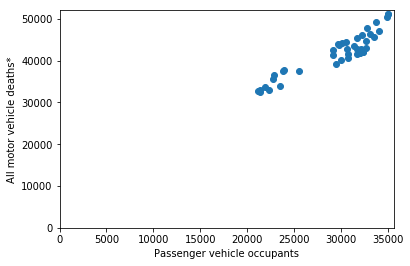

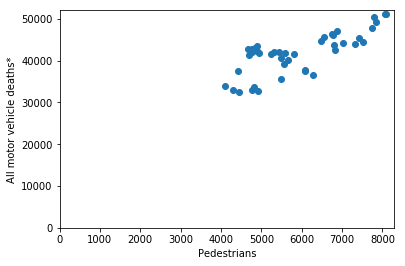

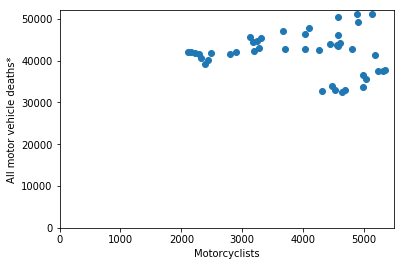

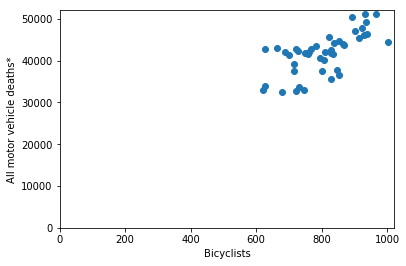

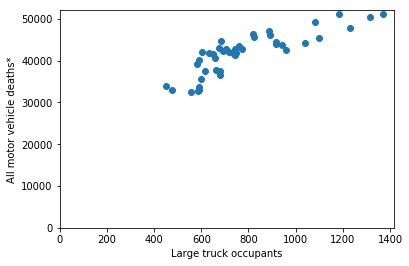

In [40]:
#This cell graphs the scatter plots for car crashes
def scatter_it(x, y):
    plt.scatter(x, y)
    plt.xlim(0)
    plt.ylim(0)
    plt.show()
    
    
car_passenger = car_crashes["Passenger vehicle occupants"]
car_pedestrians = car_crashes["Pedestrians"]
car_motorcyclists = car_crashes["Motorcyclists"]
car_bicyclists = car_crashes["Bicyclists"]
car_truck = car_crashes["Large truck occupants"]
car_all = car_crashes["All motor vehicle deaths*"]

car_column_data = [car_passenger, car_pedestrians, car_motorcyclists, car_bicyclists, car_truck, car_all]

def plot_scatter(cols):
    for x in range(len(cols)-1):
        pyplot.scatter(cols[x], cols[-1])
        pyplot.xlim(0)
        pyplot.ylim(0)
        pyplot.xlabel(car_titles[x])
        pyplot.ylabel(car_titles[-1])
        pyplot.show()
plot_scatter(car_column_data)


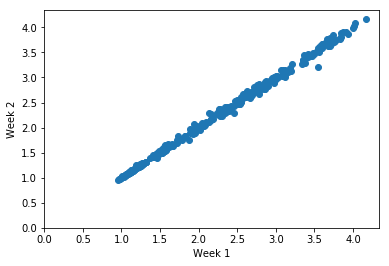

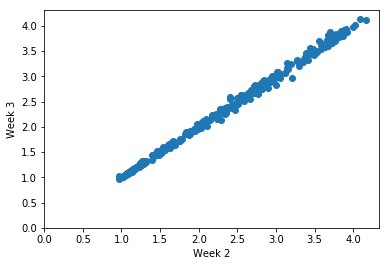

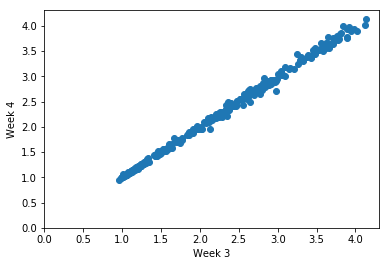

In [41]:
#This cell graphs the scatter plots for gas prices

gas_week1 = gas_prices_df[gas_title[0]]
gas_week2 = gas_prices_df[gas_title[1]]
gas_week3 = gas_prices_df[gas_title[2]]
gas_week4 = gas_prices_df[gas_title[3]]

gas_column_data = [gas_week1, gas_week2, gas_week3, gas_week4]


def gas_plot_scatter(cols):
    for x in range(len(cols)-1):
        pyplot.scatter(cols[x], cols[x+1])
        pyplot.xlim(0)
        pyplot.ylim(0)
        pyplot.xlabel(gas_title[x])
        pyplot.ylabel(gas_title[x+1])
        pyplot.show()
gas_plot_scatter(gas_column_data)

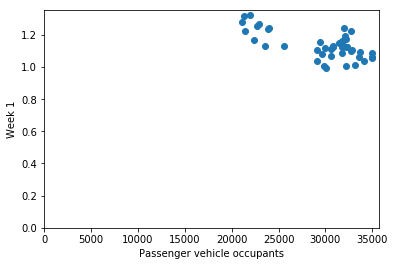

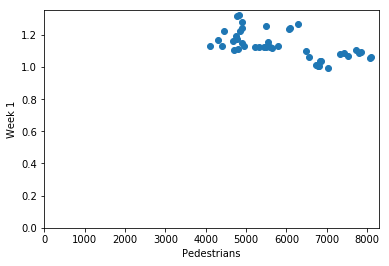

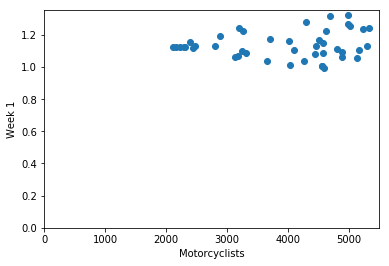

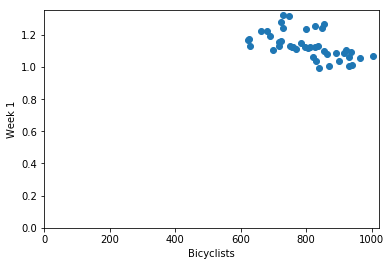

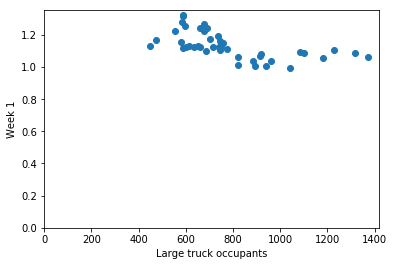

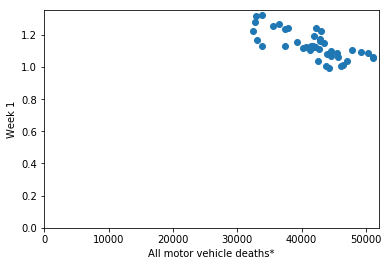

In [42]:
#This function graphs the scatter plots for both car crashes and week 1 gas prices
def both_plot_scatter_w1(cols):
    for x in range(len(cols)):
        pyplot.scatter(cols[x],  gas_column_data[0][:len(car_column_data[1])])
        pyplot.xlim(0)
        pyplot.ylim(0)
        pyplot.xlabel(car_titles[x])
        pyplot.ylabel(gas_title[0])
        pyplot.show()
both_plot_scatter_w1(car_column_data)

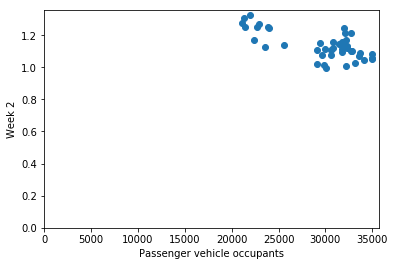

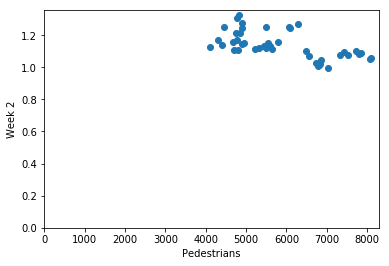

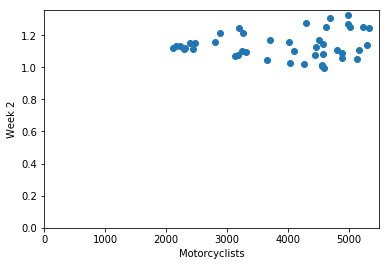

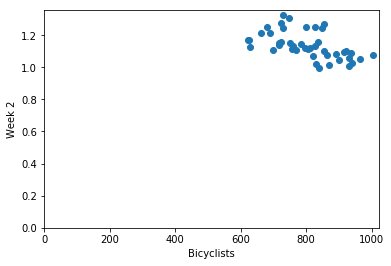

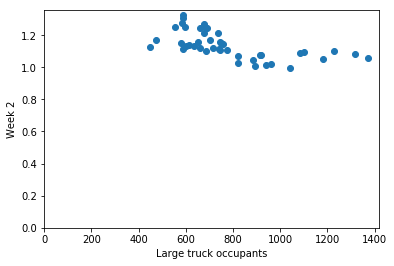

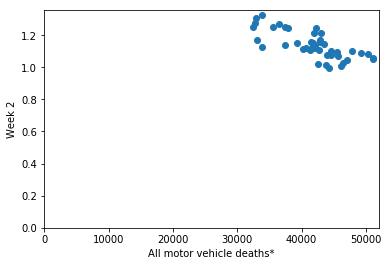

In [43]:
#This function graphs the scatter plots for both car crashes and week 2 gas prices
def both_plot_scatter_w2(cols):
    acc = 0
    for x in range(len(cols)):
        pyplot.scatter(cols[x],  gas_column_data[1][:len(car_column_data[1])])
        pyplot.xlim(0)
        pyplot.ylim(0)
        pyplot.xlabel(car_titles[x])
        pyplot.ylabel(gas_title[1])
        pyplot.show()
    acc +=1
both_plot_scatter_w2(car_column_data)

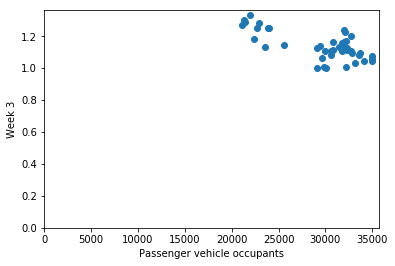

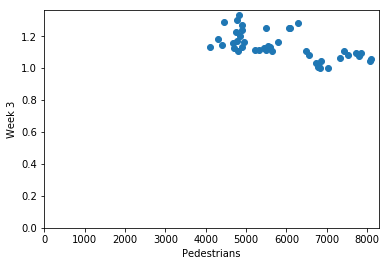

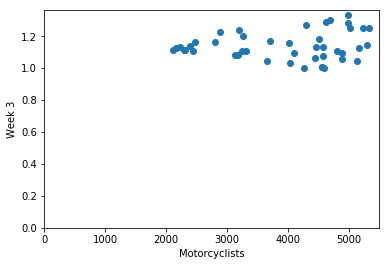

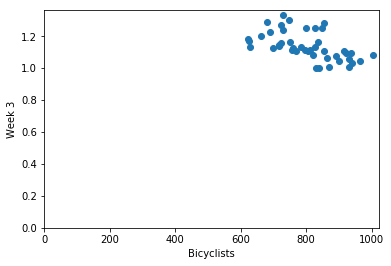

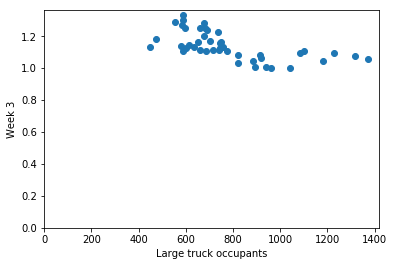

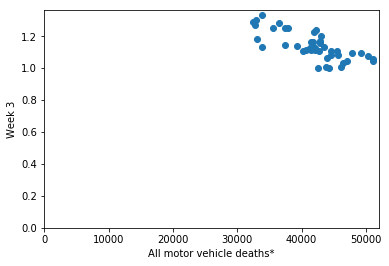

In [44]:
#This function graphs the scatter plots for both car crashes and week 3 gas prices
def both_plot_scatter_w3(cols):
    acc = 0
    for x in range(len(cols)):
        pyplot.scatter(cols[x],  gas_column_data[2][:len(car_column_data[1])])
        pyplot.xlim(0)
        pyplot.ylim(0)
        pyplot.xlabel(car_titles[x])
        pyplot.ylabel(gas_title[2])
        pyplot.show()
    acc +=1
both_plot_scatter_w3(car_column_data)

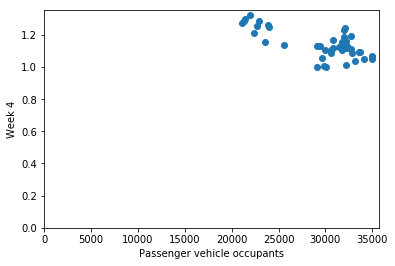

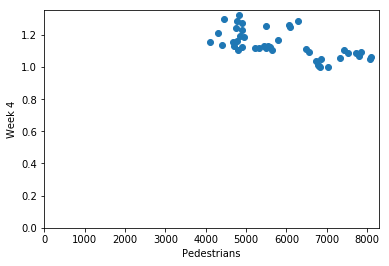

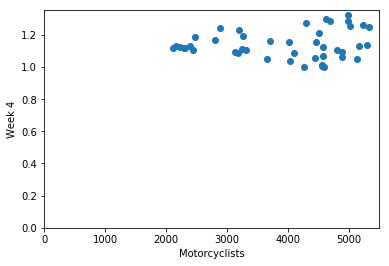

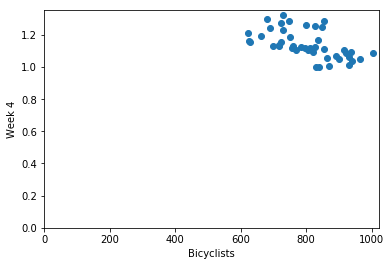

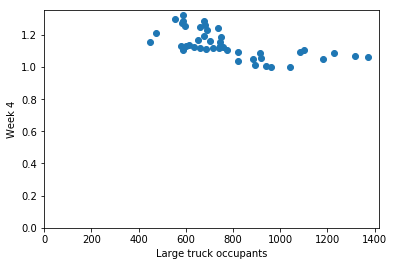

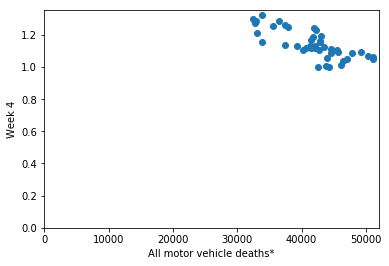

In [45]:
#This function graphs the scatter plots for both car crashes and week 4 gas prices
def both_plot_scatter_w4(cols):
    acc = 0
    for x in range(len(cols)):
        pyplot.scatter(cols[x],  gas_column_data[3][:len(car_column_data[1])])
        pyplot.xlim(0)
        pyplot.ylim(0)
        pyplot.xlabel(car_titles[x])
        pyplot.ylabel(gas_title[3])
        pyplot.show()
    acc +=1
both_plot_scatter_w4(car_column_data)

Passenger vehicle occupants


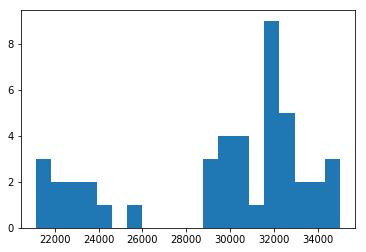

Pedestrians


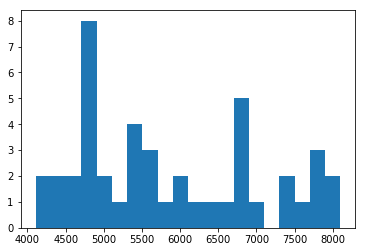

Motorcyclists


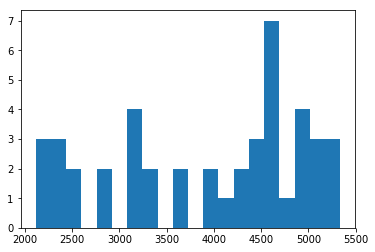

Bicyclists


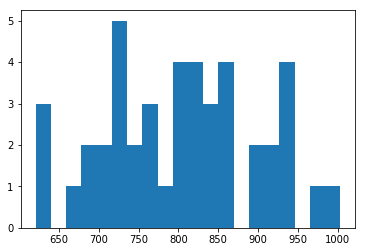

Large truck occupants


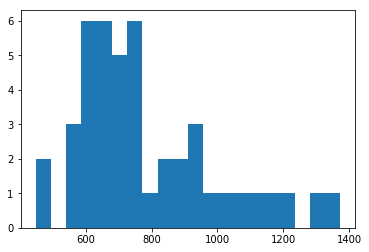

All motor vehicle deaths*


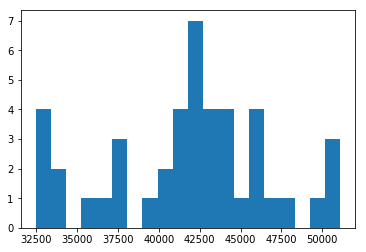

In [46]:
#This function plots the histogram for car crashes 
for x in range(len(car_column_data)):
    print(car_titles[x])
    pyplot.hist(car_column_data[x], bins=20)
    pyplot.show()

# note: counts are on the y axis

Week 1


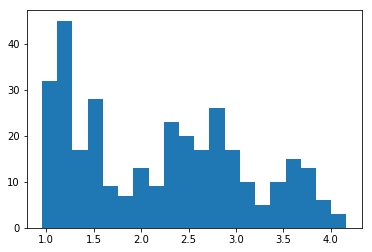

Week 2


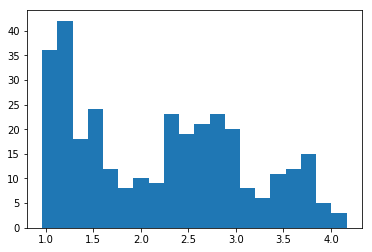

Week 3


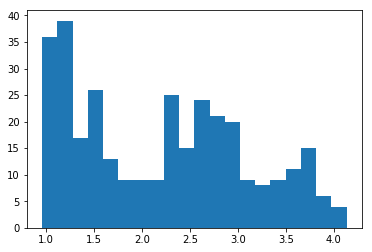

Week 4


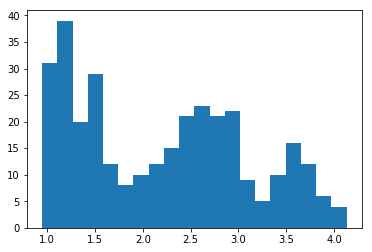

In [47]:
#This function plots the histogram for gas prices
for x in range(len(gas_column_data)):
    print(gas_title[x])
    pyplot.hist(gas_column_data[x], bins=20)
    pyplot.show()

In [48]:
#This function converts the each item in a list into an array of floats because ints and floats will raise
# in error when building the linear regression model. To prevent this error, all number are being converted
# to a float
def convert_car_nums(car_arry):
    all_conversions = []
    for x in car_arry:
        all_conversions.append(convert(x))
    return all_conversions
car_nums_conversions = convert_car_nums(car_column_data)




#This function finds the linear regression between car crashes and gas prices 
def calc_lin_reg(x_list, y_list):
    for data_column in range(len(x_list)):
        data = {"X": x_list[data_column], "Y": y_list}
        dataframe = pd.DataFrame(data)

        x = dataframe.X.values
        y = dataframe.Y.values

        x = x.reshape(-1, 1)
        y = y.reshape(-1, 1)

        model = linear_model.LinearRegression()
        model.fit(x,y)
        print(car_titles[data_column] + " :"+ str(float(model.coef_)))

print("Gas price week 1 linear regressions with: ")
short_w1 = gas_column_data[0][:len(car_column_data[1])]
calc_lin_reg(car_nums_conversions, short_w1)
print(" ")

print("Gas price week 2 linear regressions with: ")
short_w2 = gas_column_data[1][:len(car_column_data[1])]
calc_lin_reg(car_nums_conversions, short_w2)
print(" ")

print("Gas price week 3 linear regressions with: ")
short_w3 = gas_column_data[2][:len(car_column_data[1])]
calc_lin_reg(car_nums_conversions, short_w3)
print(" ")

print("Gas price week 4 linear regressions with: ")
short_w4 = gas_column_data[3][:len(car_column_data[1])]
calc_lin_reg(car_nums_conversions, short_w4)
print(" ")


Gas price week 1 linear regressions with: 
Passenger vehicle occupants :-1.3276591334494213e-05
Pedestrians :-4.235536045229959e-05
Motorcyclists :1.0083106688900558e-05
Bicyclists :-0.0004730645253727353
Large truck occupants :-0.00022863256929905065
All motor vehicle deaths* :-1.2346323536193374e-05
 
Gas price week 2 linear regressions with: 
Passenger vehicle occupants :-1.3357534976736282e-05
Pedestrians :-4.2831896994115646e-05
Motorcyclists :8.897305370036259e-06
Bicyclists :-0.00046849995555016036
Large truck occupants :-0.00023436303430904683
All motor vehicle deaths* :-1.249212860645167e-05
 
Gas price week 3 linear regressions with: 
Passenger vehicle occupants :-1.411600461086099e-05
Pedestrians :-4.468421917553066e-05
Motorcyclists :1.067513773750926e-05
Bicyclists :-0.0004873638357007575
Large truck occupants :-0.0002435779977791467
All motor vehicle deaths* :-1.3108076816883328e-05
 
Gas price week 4 linear regressions with: 
Passenger vehicle occupants :-1.4377518843796

In [49]:
#This function rreturns the random linear regression for car crash deaths
def car_random_regression(n, column):
    y = []
    for i in range(len(car_column_data[0])):
        y.append(np.random.normal(0, 1))
        
    data = {"x": column, "y": y}
    dataframe = pd.DataFrame(data)
    x = dataframe.x.values
    y = dataframe.y.values
    
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)
    
    model = linear_model.LinearRegression()
    model.fit(x,y)
    return float(model.coef_)
print("Random regressions for car crash deaths with n=length of observations:")
for x in range(len(car_column_data)):
    print(car_titles[x] + ' ' + str(car_random_regression(len(car_column_data[0]), car_column_data[x])))
print(" ")


print("Random regressions for car crash deaths with n=10:")
for x in range(len(car_column_data)):
    print(car_titles[x] + ' ' + str(car_random_regression(10, car_column_data[x])))
print(" ")
    
    

#This function returns the random linear regression for gas prices
def gas_random_regression(n, column):
    y = []
    for i in range(len(gas_column_data[0])):
        y.append(np.random.normal(0, 1))
        
    data = {"x": column, "y": y}
    dataframe = pd.DataFrame(data)
    x = dataframe.x.values
    y = dataframe.y.values
    
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)
    
    model = linear_model.LinearRegression()
    model.fit(x,y)
    return float(model.coef_)

print("Random regressions for gas prices with n=length of observations:")
for x in range(len(gas_column_data)):
    print(gas_title[x] + ' ' + str(gas_random_regression(len(gas_column_data[0]), gas_column_data[x])))
print(" ")


print("Random regressions for gas prices with n=10:")
for x in range(len(gas_column_data)):
    print(gas_title[x] + ' ' + str(gas_random_regression(10, gas_column_data[x])))



Random regressions for car crash deaths with n=length of observations:
Passenger vehicle occupants 7.715934852387937e-06
Pedestrians 0.00011818848065338047
Motorcyclists -9.251168559931385e-05
Bicyclists -0.0006571388445561886
Large truck occupants -9.090450050820916e-05
All motor vehicle deaths* -2.5709018299660412e-05
 
Random regressions for car crash deaths with n=10:
Passenger vehicle occupants -4.011766193106879e-05
Pedestrians -0.00016179088109475196
Motorcyclists -3.2101681400901174e-05
Bicyclists -0.000836908211985439
Large truck occupants 0.00028788206681180304
All motor vehicle deaths* 3.515761746294571e-05
 
Random regressions for gas prices with n=length of observations:
Week 1 0.04604238615681704
Week 2 -0.036133202330851856
Week 3 0.038803650614080844
Week 4 0.08239804095283654
 
Random regressions for gas prices with n=10:
Week 1 -0.06702084223298171
Week 2 0.0173463540986455
Week 3 0.027722434949653908
Week 4 6.13576866252623e-05


                                                Final Report

**Introduction**

    The following data analysis evaluates the potential relationship between motor vehicle related deaths and gas prices. The two data sets being used have been web scraped and collected from the “Insurance Institute for Highway Safety, Highway Loss Data Institute (IIHS HLDI),”  and the, “U.S. Energy Information Administration (EIA).” In 2018, the IIHS HLDI published the results from the U.S. Department of Transportation’s annual motor vehicle death census with the intention of evaluating the impact of motor vehicle deaths on American public health while also evaluating the change in car related deaths between 1975 and 2018. Each week during the year, the EIA updates the average cost of a gallon of gasoline in the United States to track the change in gasoline prices across multiple decades, particularly from April 1993 to present day. Through comparing the observed trends and relationships in both data sets, as well as simply comparing raw data, I have focused on answering the research question: What impact does (the change in) gas prices have on (the rate of) annual motor vehicle related deaths in the United States? My main findings are: motor vehicle deaths and gas prices have negative, low correlations, and vehicle deaths appear to decline with the increase in gas prices. 


**Data Sheet/Data Description** 

    In the following section, car crash related mortalities data set is referred to as, “Data Set 1.” The gasoline prices data set is referred to as, “Data Set 2.”


   *What are the observations (rows) and the attributes (columns)?*
   
     In Data Set 1, the observations (rows) are: each year between 1975 and 2018. The columns consist of total counts for motor vehicle deaths being: (total population), a passenger in the crashed vehicle (“Passenger vehicle occupants”), pedestrians, motorcyclists, bicyclists, a passenger in a large truck (“Large truck occupants”), and (all motor vehicle deaths). 

    In Data Set 2, the observations (rows) are: each month between April of 1993 and present day (May 2020). An example format is: 1993-Apr. The attributes (columns) of this data are the values for the national average price for a gallon of gasoline per week (one through five)  -- aligning with the associated month and year. ( An example of the column title format is: Week 1.) Values for the prices are represented as floats. 



   *Why was this dataset created? Who funded the creation of the dataset?*
   
    Data Set 1 was created by the “Insurance Institute for Highway Safety, Highway Loss Data Institute” on the behalf of the U.S. Department of Transportation. The Department of Transportation funded and created the data set with the intention of  “quantifying the public health problem of motor vehicle deaths” (IIHS HLDI). The instances throughout the data set represent the single total number of deaths per 100,000 people for each category. For example, there is one instance (example: 7,516) for the total, raw number of pedestrian deaths in the year 1988. Even though the data set is a collection of data about people retrieved through conducting a census, the data does not contain any information that may be used to potentially identify a specific individual. This data could also be used by insurance companies to adjust their policies based on the rate of motor vehicle deaths each year. 

    Data Set 2 was created by and on the behalf of the U.S. Energy Information Administration with the goal of tracking the raw data and changes in the average values of the cost of a gallon of gasoline between 1993 and (continuously updating) present day. The instances in the data set represent the value for a single national average price of a gallon of gas for each week of each year in the United States. For example, the data set contains one instance (example: 1.068) to represent the national average price of a gallon of gas, aligning with a given week month (example: week 1 in 1993-Apr). Data Set 2 could also be used to predict the amount of savings a driver would have if he or she  decides to transition to an electric powered car from a gasoline powered car.  
     ( Disclaimer: Before proceeding to analyze the data,  I omitted “week five” from the gas prices data set to allow each month to contain only four weeks, maintaining the balance and equal number of columns in the set.)



   *What processes might have influenced what data was observed and recorded and what was not?*
   
    Regarding Data Set 1,  processes that might have influenced which data was observed a and which was not observed include: the number of reported accidents contributed to the data observed, while the number of unreported accidents may have contributed to the unobserved data. Instant fatalities (such as a person dying on the scene of the car crash) may have been instantly recorded and therefore contributed to the observed data, though delayed fatalities (such as a person dying in the hospital 3 weeks after the car crash) may have not been recorded and consequently contribute to the amount of unrecorded data. 


    With reference to Data Set 2, processes that may have influenced which data was recorded and which data was not recorded include: if some gas prices in chosen gas stations, cities, and states were included in the calculation of the national average, while others were not. 



   *What preprocessing was done, and how did the data come to be in the form that you are using?*
   
    In Data Set 1,  The U.S. Department of Transportation conducted a census and appointed researchers to sort and analyze the collected data. Through the process of sorting, researchers chose to display the data in the form that I am using: representing the total number of deaths by 100,000 people in the order of death type (example: passenger, motorcyclist) by year. 

    In Data Set 2, the EIA does not explicitly reveal the process of how the data was accumulated and the purpose behind its arrangement. However, considering the instances represent national averages, gas prices in multiple areas in the United States were used to calculate the national average, and therefore are values used in the data set. Considering the likelihood of this process being done weekly, the data is arranged in the order of each week per month. 



   *Where can your raw source data be found, if applicable?*
   
    The raw data used for Data Set 1  can be found on: https://www-fars.nhtsa.dot.gov/Main/index.aspx . Though, the data source being used can be found on: https://www.iihs.org/topics/fatality-statistics/detail/yearly-snapshot 

    The raw data used for Data Set 2 can be found on: https://www.eia.gov/dnav/pet/hist/LeafHandler.ashx?n=PET&s=EMM_EPM0_PTE_NUS_DPG&f=W 



   *Potential Problems with Your Dataset*
   
    Potential problems with my dataset include:
    - The number of observations in Data Set 1 and Data Set 2 differ. This may lead to complications when plotting scatter plots and calculating slopes/ linear regression. 
    - The years for the observation in each data set begin at different times. 
    - Gas prices may have minimal variation, potentially causing observations to have a limited variety of relationships and trends. 


**Data analysis and evaluation of significance**

        In the analysis of the Motor Vehicle deaths data set, the evaluations are focused on the "Passenger vehicle occupants," "Pedestrians," (and "All motor vehicle deaths") columns because they contain the highest number of deaths. "Week 1" and "Week 3" will be the focus points for the analysis of the Gas Prices data set. 

        To begin the data analysis process, I first calculated the mean for each column in the two data frames. To find the means, I wrote and called the function, “calc_mean,” that accepts an array as a parameter, and divides the sum of observations by the total number of observations. The mean of the passenger vehicle occupants' deaths is 29600, which is closest to the number of deaths reported in the year 1982. This observation indicates that the number of passenger deaths were highest in the years before 1983, causing the mean to skew towards earlier years. The mean of pedestrian deaths is 5885, which is closest to 1985's total number of pedestrian deaths. Similar to passenger deaths, this also indicates a skew towards earlier years, revealing that the rates of pedestrian deaths has also decreased across decades. 
        The “Week 1” and “Week 3” columns have roughly the same mean -- rounded to 2.20. The mean of the two columns is closest to the average national price value found in June 2005. This observation  signifies a more frequent occurrence of higher prices in later years (after 2000), opposed to years in the 1990s.
  
   
        Continuing, I calculated the standard deviation for each column in the data sets. To calculate the standard deviation on each column, I called the built-in function. “.std(),” which takes in an array as a parameter. The standard deviation of passenger vehicle occupants’ deaths is 4275. The standard deviation of pedestrians’ deaths is 1175. The high standard deviations reveal that many of the values are far from the mean, hinting that the mean does not adequately represent the variety of values in each of the columns. 
        Regarding gas prices, the standard deviations for Week 1 and Week 3 were again roughly the same, rounding to 0.89. The low standard deviation indicates that the values in each column are close to the mean, hinting that mean provides an accurate representation of all of the values in the data set.

 
        Scatter plots for each of the selected Motor Vehicle deaths’ columns are compared against “All motor vehicle deaths.”  The passenger deaths scatter plot shows that passenger deaths increase at a linear rate along all deaths. However, pedestrians’ scatter plot demonstrates a more exponential increase of deaths along all car crash related deaths.  Both scatter plots reveal that passenger and pedestrian deaths are constantly increasing, though pedestrian deaths have a tendency to increase at a slower rate than passenger deaths. 
        The scatter plots for Week 1 and Week 3 of gas prices are compared against Week 2 of gas prices. Both plots are identical, showing that gas prices increase linearly at a steady pace. 
        Scatter plots combining both data sets are formed with passenger or pedestrian deaths on the x-axis and week 1 or week 3 of gasoline prices on the y-axis. The scatter plot for pedestrian deaths and week 1, as well as the scatter plot for pedestrian deaths and week 3, reveals a negative, linear trend, signaling: as gas prices increase, passenger deaths decrease. Likewise, the scatter plot for pedestrian deaths and week 1, along with that of pedestrian deaths and week 3,   reveals a negative linear trend. As gas prices increase, pedestrian deaths also decrease, though at a slower rate than that of passenger deaths.  

   
        Using the “pyplot” module, I graphed histograms for passenger deaths, pedestrian deaths, week 1 gas prices, and week 3 gas prices. Passenger deaths’ histogram reveals that the most frequent  count of passenger deaths falls in the 32,000 range.  Pedestrians deaths’ histogram reveals  that the most frequent  count of pedestrian deaths falls in the 4,750 range. These observations indicate that most years report having around 32,000 passenger deaths and around 4,750 pedestrian deaths.
        The histograms for Week 1 and Week 3 are nearly identical, revealing that in most years, the national average price of a gallon of gasoline during the first and third week of each month has a value around 1.25. 

   
        Regression was used to evaluate the relationship between the Motor Vehicle deaths and Gasoline Prices data sets. I calculated the regression coefficient for each of the columns by calling python’s built-in sklearn linear model function after converting all values to floats to prevent an error that arises when the types of variables do not match. The regression coefficients between passenger deaths and week 1, along with passenger deaths and week 3, round to -0.00001. The regression coefficient between pedestrians deaths and week 1, as well as pedestrian deaths and week 3, round to -0.00004. The negative regression coefficients demonstrate a negative correlation between car crash deaths and gas prices. Though, considering the coefficient is low, less than 1, the coefficient is not significant, indicating that vehicle induced deaths and gas prices occur independently of one another.

   
        To evaluate the significance of the data and to compare observed relationships in the data to randomness, I calculated the random linear regression for each data set. I wrote separate random linear regression functions for each set to prevent a possible syntax error that may have arisen when passing in the name of the data array to index. With the column data on the x-axis and data generated by numpy’s random.normal function on the y-axis, I calculated passenger death’s random linear regression coefficient  as -0.00005, and pedestrian death’s random linear regression coefficient as -0.00010. Calling the random linear regression function on week 1 produced a random linear regression coefficient as 0.019, a coefficient of 0.031 for week 3. Even though each of the data sets returned higher coefficients with random linear regression as opposed to regular linear regression, the difference is minimal, indicating the significance and  relationships in the observed data is likely not due to randomness. 


**Conclusion**

        With each aspect of the analyzed data considered, I have found that motor vehicle related deaths and gas prices  almost always increase linearly, though independent of one another. I am highly confident in these conclusions because even though both data sets have similar trends, those trends may be caused by feasible and similar outside factors, such as a raise in the cost of living, or the depreciation of the value of a dollar. Hence, correlations - or a lack thereof- does not equal causation. In the perspective of a wider context and considering observations from the scatter plots illustrating a possible relationship between vehicle deaths and gas prices, an increase in gas prices appears to possibly influence less drivers operating their vehicles, resulting in less fatal car accidents. Continuing, limiting the availability of resources needed to operate a vehicle may discourage more drivers from driving, consequently and indirectly causing lowering rates on motor vehicle deaths. Though, in a future investigation, this theory should be further evaluated by incorporating other factors such as the average prices of tires, used cars, new cars, and car insurance. Considering that I have accomplished finding related trends, though insignificant correlations, another future study can evaluate the relationship between week 2 and week 4 gas prices with the other columns in the motor vehicle deaths data frame. Another option is to evaluate the rates of change in motor vehicle deaths and the rates of change in gas prices to possibly discover a stronger or different correlation.

        Reflecting on attempted methods, I tried finding the linear regression for all observations in the gas prices data frame and all observations in the motor vehicle deaths data frame. Though, because the data sets were of different lengths, my attempt was unsuccessful. Therefore, I was unable to find the linear regression for each type of vehicle death with all observations of gas prices. In a hypothetical future version, I would calculate the linear regression between all observations in each data set. Additionally, I would find the national average gas price for each month between the years of 1975 and 1992 in order to compare the observations and trends in vehicle deaths and gas prices directly by each year. 

**Source Code**

    Motor Vehicle Deaths:
    view-source:https://www.iihs.org/topics/fatality-statistics/detail/yearly-snapshot

    Gas Prices:
    view-source:https://www.eia.gov/dnav/pet/hist/LeafHandler.ashx?n=PET&s=EMM_EPM0_PTE_NUS_DPG&f=W


**Acknowledgements**

    I give acknowledgement to previous homework assignments (hw3-8), geeksforgeeks.org, numpy documentation, pandas documentation, and matplotlib documentation contributing to the completion of this assignment.  


Word Count: 2,631